<a href="https://colab.research.google.com/github/nay-uku/studia/blob/main/Natural%20language%20processing/z1_tfidf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Utworzyć korpus dokumentów na podstawie 5-10 książek pobranych ze strony Wolne Lektury: https://wolnelektury.pl/
!curl https://wolnelektury.pl/media/book/txt/zwierzeta-ludzie-bogowie.txt > 'Zwierzeta, ludzie, bogowie.txt'
!curl https://wolnelektury.pl/media/book/txt/zemsta.txt > Zemsta.txt
!curl https://wolnelektury.pl/media/book/txt/platon-panstwo.txt > Panstwo.txt
!curl https://wolnelektury.pl/media/book/txt/ksiega-dzungli.txt > 'Ksiega dzungli.txt'
!curl https://wolnelektury.pl/media/book/txt/rozmyslania-marek-aureliusz.txt > Rozmyslania.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  540k  100  540k    0     0  1616k      0 --:--:-- --:--:-- --:--:-- 1616k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   99k  100   99k    0     0   570k      0 --:--:-- --:--:-- --:--:--  570k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  992k  100  992k    0     0  2804k      0 --:--:-- --:--:-- --:--:-- 2796k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  314k  100  314k    0     0  1326k      0 --:--:-- --:--:-- --:--:-- 1326k
  % Total    % Received % Xferd  Average Speed   Tim

In [2]:
import glob
books = glob.glob('*.txt')
print(books)

['Panstwo.txt', 'Rozmyslania.txt', 'Zemsta.txt', 'Zwierzeta, ludzie, bogowie.txt', 'Ksiega dzungli.txt']


In [3]:
import nltk
corpus = []
for i in range(len(books)):
  with open(books[i],'r') as f:
    raw=f.read()
    corpus.append(raw)
#corpus

In [4]:
# Ściągnięcie polskiej stoplisty
!curl https://raw.githubusercontent.com/stopwords-iso/stopwords-pl/master/stopwords-pl.txt > polish_stopwords

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1838  100  1838    0     0  10211      0 --:--:-- --:--:-- --:--:-- 10211


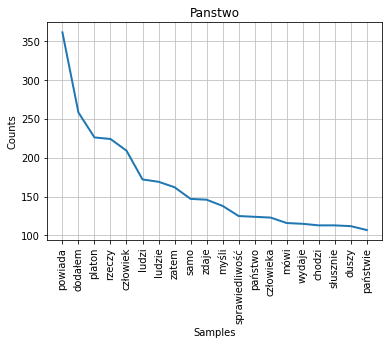

r*f:
361 516 678 896 1045 1032 1183 1296 1323 1460 1518 1500 1612 1722 1740 1840 1921 2034 2128 2140 2184 2266 2323 2400 2400 2496 2592 2604 2697 2760 2852 2880 2970 3026 3045 3132 3034 3040 3081 3080 3075 3150 3182 3212 3285 3312 3384 3408 3430 3450 

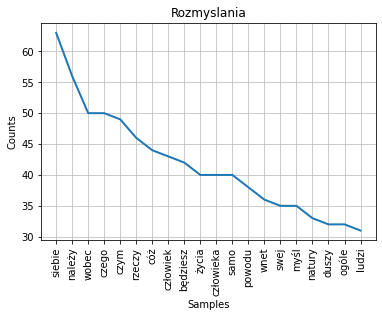

r*f:
63 112 150 200 245 276 308 344 378 400 440 480 494 504 525 560 561 576 608 620 651 682 713 672 650 676 675 700 696 720 744 736 759 748 770 792 814 836 858 880 861 882 903 924 945 920 893 912 931 950 

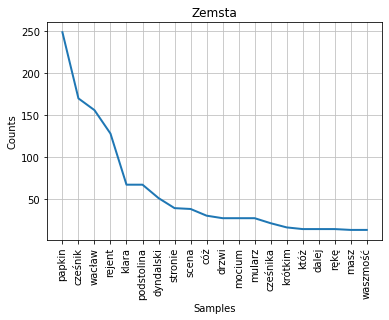

r*f:
249 340 468 512 335 402 357 312 342 300 297 324 351 294 240 224 238 252 247 260 273 264 276 288 300 312 297 308 290 300 310 320 330 340 350 324 333 342 351 320 328 336 344 352 360 368 376 336 343 350 

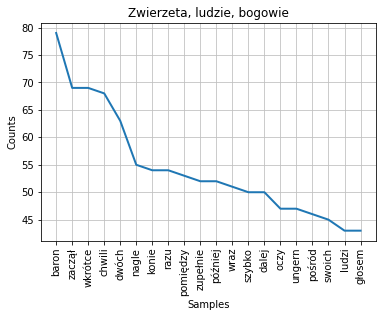

r*f:
79 138 207 272 315 330 378 432 477 520 572 612 650 700 705 752 782 810 817 860 903 902 920 960 975 1014 1053 1064 1073 1110 1147 1184 1188 1224 1260 1260 1295 1292 1326 1360 1394 1386 1376 1408 1440 1472 1504 1488 1519 1550 

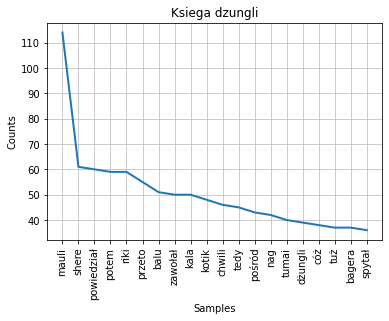

r*f:
114 122 180 236 295 330 357 400 450 480 506 540 559 588 600 624 646 666 703 720 756 792 805 840 800 754 756 784 812 810 806 832 858 884 910 900 925 950 975 1000 1025 1008 1032 1056 1035 1058 1081 1056 1078 1100 

In [5]:
# 2. Dla każdej z pozycji zwizualizować częstość występowania tokenów i skomentować zgodność z prawem Zipfa. Jako tokeny przyjmujemy tylko tokeny zbudowane wyłącznie z liter.
# Zastosować stoplistę  dla języka polskiego.

# Załadowanie polskiej stoplisty
with open('polish_stopwords', 'r') as f:
    sw = f.read().split()

tokens = [[] for i in range(len(corpus))]
filtered_tokens = [[] for i in range(len(corpus))]
for i in range(len(corpus)):
  tokens[i] = [t for t in corpus[i].split()]
  # lower() - Zamiana wszystkich tokenów na małą czcionkę.
  # Usuwa to duplikaty tokenów różniących się wielkością np. a i A
  tokens[i] = [word.lower() for word in tokens[i]] 
  # isalpha() - tokeny wyłącznie zbudowane z liter 
  filtered_tokens[i] = [w for w in tokens[i] if not w in sw and w.isalpha()] 
  freq = nltk.FreqDist(filtered_tokens[i])
  freq.plot(20,cumulative=False,title=books[i][:-4]) # tytuł bez .txt
  # Prawo Zipha
  print("r*f:")
  for i in range(50):
    print(freq.most_common(50)[i][1]*(i+1), end=' ')

Prawo Zipfa opisuje zasadę częstotliwości użycia w dowolnym języku poszczególnych wyrazów. Iloczyn częstotliwości i rangi powinien być wielkością stałą.


Równanie prawa Zipfa:

    r × f = constans

r - ranga wyrazu w tekście lub grupie tekstów (1,2,3...)
f - częstotliwość jego występowania  

Dla załączonych książek obliczono powyższy iloczyn dla 50 najczęściej występujących słów w każdej książce. Widać, że dla wybranych książek prawo Zipha zachodzi tylko w "Zemście", gdzie każdy iloczyn wynosi około 300.

Prawo Zipfa nie zachodzi dla pozostałych czterech książek. Może to wynikać z tego, że "Zemsta" jest polską książką, a pozostałe są tłumaczeniami.

In [6]:
# 3. Na podstawie korpusu zbudowanego z 5 dowolnych książek ściągniętych ze strony
# Wolne Lektury zbudować macierz tfidf.  
corpus = []
# korpus zbudowany z przefiltoriwanych tokenów:
# lowercase, brak powtórzeń i słów z stoplisty, tylko wyrazy
for d in filtered_tokens:
  d = list(dict.fromkeys(d)) # wyrzucenie duplikatów
  corpus.append(' '.join(d))
#corpus

In [7]:
import nltk
import string
import os

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words=sw,smooth_idf=False)
tfs = tfidf.fit_transform(corpus)
# tfs.todense()
# tfs.toarray()
# tfidf.get_feature_names()
import pandas as pd
tfidf_pd_matrix = pd.DataFrame(tfs.toarray(),columns=tfidf.get_feature_names(),
                               index=[book[:-4] for book in books])
tfidf_pd_matrix

,aaa,abakańskie,abdery,absolutne,absolutnie,absolutną,abstrakcje,abstynentów,abym,abyś,abyście,abyśmy,achajowie,achilles,achillesa,achillesowi,aczyńskiej,adam,adejmancie,adejmant,adejmanta,adejmantos,adejmantowi,adiutancie,adiutant,adiutanta,adiutantami,adiutantem,administracja,administracji,administracją,administrację,administracyjne,administracyjnych,administratorowi,adrasteja,adresem,adresy,aeronautycznym,afekt,...,żółtaczkę,żółte,żółtego,żółtej,żółtoszarych,żółty,żółtych,żółtym,żółtymi,żółtą,żółwie,żółć,żąda,żądaj,żądają,żądając,żądali,żądam,żądane,żądania,żądanie,żądaniom,żądać,żądał,żądała,żądało,żądeł,żądny,żądnym,żądz,żądza,żądzami,żądze,żądzom,żądzy,żądzą,żądzę,żądła,żądłami,żądło
Panstwo,0.000000,0.000000,0.009457,0.009457,0.006945,0.009457,0.009457,0.009457,0.004433,0.005475,0.000000,0.005475,0.009457,0.009457,0.009457,0.009457,0.000000,0.009457,0.009457,0.009457,0.009457,0.009457,0.009457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006945,0.000000,0.006945,0.000000,0.000000,0.000000,0.009457,0.009457,0.006945,0.000000,0.00000,...,0.000000,0.006945,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004433,0.000000,0.006945,0.000000,0.000000,0.000000,0.000000,0.000000,0.006945,0.000000,0.000000,0.005475,0.000000,0.000000,0.009457,0.005475,0.000000,0.009457,0.003624,0.009457,0.009457,0.009457,0.006945,0.006945,0.009457,0.006945,0.009457,0.009457
Rozmyslania,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008063,0.009959,0.000000,0.009959,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.017201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017201,0.008063,0.017201,0.012632,0.000000,0.017201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009959,0.000000,0.017201,0.000000,0.000000,0.000000,0.000000,0.006592,0.000000,0.000000,0.000000,0.012632,0.012632,0.000000,0.000000,0.000000,0.000000
Zemsta,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012075,0.014915,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02576,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012075,0.000000,0.000000,0.000000,0.000000,0.018917,0.000000,0.018917,0.018917,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009872,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Zwierzeta, ludzie, bogowie",0.000000,0.009274,0.000000,0.000000,0.006810,0.000000,0.000000,0.000000,0.004347,0.000000,0.000000,0.005369,0.000000,0.000000,0.000000,0.000000,0.009274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009274,0.009274,0.009274,0.009274,0.009274,0.009274,0.006810,0.009274,0.006810,0.009274,0.009274,0.009274,0.000000,0.000000,0.006810,0.009274,0.00000,...,0.000000,0.006810,0.009274,0.009274,0.009274,0.009274,0.009274,0.009274,0.009274,0.009274,0.009274,0.000000,0.004347,0.000000,0.000000,0.006810,0.000000,0.000000,0.009274,0.006810,0.000000,0.009274,0.009274,0.005369,0.009274,0.000000,0.000000,0.005369,0.009274,0.000000,0.003554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ksiega dzungli,0.012102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [8]:
# 4. W oparciu o podobieństwo kosinusowe zbudować macierz odległości dokumentów. 
from sklearn.metrics.pairwise import cosine_similarity
# print(cosine_similarity(tfs[0], tfs)) # dla jednego wiersza
# print(cosine_similarity(tfs[1], tfs))
cs_matrix = cosine_similarity(tfs, tfs)
cs_matrix = pd.DataFrame(cs_matrix,columns=[book[:-4] for book in books],index=[book[:-4] for book in books])
cs_matrix

,Panstwo,Rozmyslania,Zemsta,"Zwierzeta, ludzie, bogowie",Ksiega dzungli
Panstwo,1.000000,0.149584,0.067082,0.125177,0.115722
Rozmyslania,0.149584,1.000000,0.067839,0.086832,0.087293
Zemsta,0.067082,0.067839,1.000000,0.065258,0.077376
"Zwierzeta, ludzie, bogowie",0.125177,0.086832,0.065258,1.000000,0.140818
Ksiega dzungli,0.115722,0.087293,0.077376,0.140818,1.000000


In [9]:
#5. Przeprowadzić redukcję wymiarowości wymiarów macierzy tf-idf do 2 wymiarów  i zwizualizować położenie dokumentów na układzie współrzędnych.
df = tfidf_pd_matrix
# Rozdzielenie cech
x = df.loc[:].values
y = df.index.values

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])
principalDf['target'] = y # dodanie tytułu do tabeli
# principalDf # tabela PCA

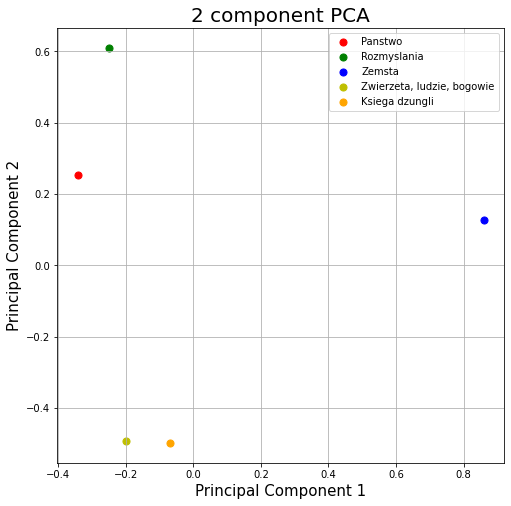

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = y
colors = ['r', 'g', 'b', 'y', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1'],
               principalDf.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()

6. Skomentować spójność wyników z punktu 4 i 5. Które dokumenty są najbardziej podobne do siebie  w obydwu wariantach ?

W PCA najbardziej podobne do siebie są "Księga dżungli" i "Zwierzęta, ludzie, bogowie". Obydwie książki opisują przygody dziejące się w dżunglach oraz zostały napisane i przetłumaczone w XX wieku, stąd słownictwo w nich jest podobne. Z odległości na PCA można odnieść jednak wrażenie, że są do siebie bardziej podobne, niż to wynika z macierzy podobieństwa kosinusowego (0,14).

Z podobieństwa kosinusowego najbardziej podobne są do siebie "Państwo" i "Rozmyślania" ~ 0.15. Odległość na PCA jest jednak dalsza niż na poprzednim zestawieniu. Obydwie są książkami filozoficznymi i zostały napisane w starożytności, lecz przetłumaczone na współczesny polski. Być może dlatego cztery wymienione książki leżą blisko siebie pod względem współrzędnej PC1.

"Zemsta" w obydwóch przypadkach nie jest podobna do innych książek. Jest to komedia teatralna z okresu Romantyzmu, więc słownictwo w niej użyte bardzo różni się od współczesnego polskiego, którym przetłumaczone zostały pozostałe książki i na PCA znajduje się daleko od nich.

